# Trabalhando com planilhas excel

In [1]:
# Importando a biblioteca pandas
import pandas as pd

In [3]:
# Leitura de arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [4]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [5]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
# Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
# Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
187,Salvador,2019-01-02,3.85,1035,3
168,Salvador,2019-01-02,20.22,1036,1
2,Salvador,2019-02-10,173.59,1035,3
22,Recife,2019-01-01,39.53,983,3
15,Natal,2018-02-01,432.00,854,3


In [9]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
# Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [13]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
# Substituindo valores pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [15]:
df["Vendas"].mean()

122.61180089485438

In [16]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [19]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [20]:
# Apagando valores nulos com base em apenas uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [21]:
# Removando linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [22]:
# criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [25]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [26]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [27]:
# Retornando a menor receita
df["Receita"].min()

3.34

In [28]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [29]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [30]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [33]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [34]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [35]:
# Transformando a coluna Data em data
df["Data"] = pd.to_datetime(df["Data"])

In [36]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [37]:
# Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [39]:
# Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
179,Natal,2019-01-02,64.95,1036,1,64.95,1.0,2019
69,Fortaleza,2019-01-01,216.65,1003,6,1299.90,6.0,2019
197,Salvador,2019-01-02,10.45,1036,2,20.90,2.0,2019
144,Salvador,2019-01-02,23.38,1034,1,23.38,1.0,2019
18,Aracaju,2018-01-01,32.14,1522,6,192.84,6.0,2018


In [41]:
# Exibindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
53,Fortaleza,2019-01-01,11.48,1002,4,45.92,4.0,2019,1,1
186,Natal,2019-01-02,169.09,1036,2,338.18,2.0,2019,1,2
2,Recife,2019-02-10,12.94,983,5,64.70,5.0,2019,2,10
73,Recife,2019-01-01,39.71,981,5,198.55,5.0,2019,1,1
102,Salvador,2019-01-01,40.84,1034,3,122.52,3.0,2019,1,1


In [43]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [44]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2.0,2018,1,1,0 days
86,Salvador,2019-01-01,156.47,1037,3,469.41,3.0,2019,1,1,365 days
93,Salvador,2019-01-01,15.58,1037,1,15.58,1.0,2019,1,1,365 days
47,Natal,2018-03-13,521.00,854,3,1563.00,3.0,2018,3,13,71 days
91,Aracaju,2018-01-01,200.85,1522,6,1205.10,6.0,2018,1,1,0 days


In [59]:
# Criando colunas de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [60]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
12,Salvador,2019-01-01,125.05,1034,3,375.15,3.0,2019,1,1,365 days,1,1
20,Natal,2018-06-08,608.00,852,4,2432.00,4.0,2018,6,8,158 days,2,2
114,Fortaleza,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1,1
97,Salvador,2019-01-01,39.91,1037,3,119.73,3.0,2019,1,1,365 days,1,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.0,2019,3,2,425 days,1,1


In [61]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [62]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1,1


In [63]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
135,Fortaleza,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1,1
69,Natal,2019-03-24,817.00,852,4,3268.00,4.0,2019,3,24,447 days,1,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days,1,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1,1
75,Natal,2019-03-30,706.00,854,2,1412.00,2.0,2019,3,30,453 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1,1
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1,1
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days,1,1


# Visualização de dados

In [64]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

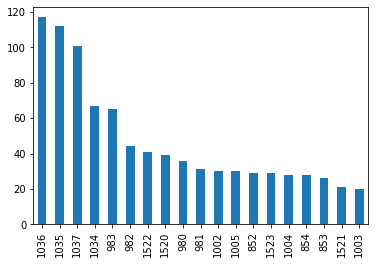

In [65]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

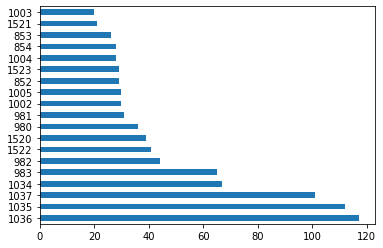

In [66]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

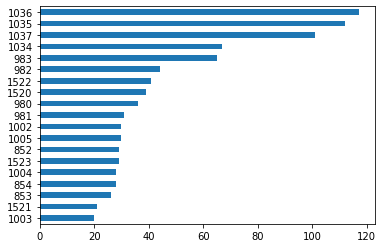

In [68]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

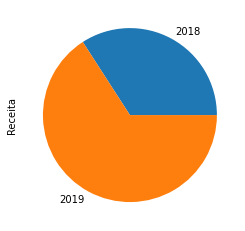

In [69]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [71]:
# Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

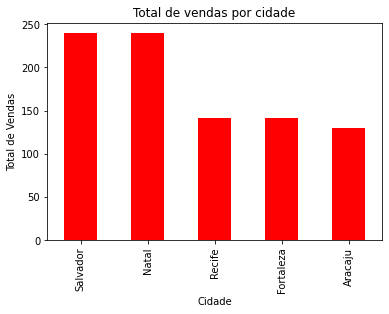

In [72]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [73]:
# Alterando o estilo
plt.style.use("ggplot")

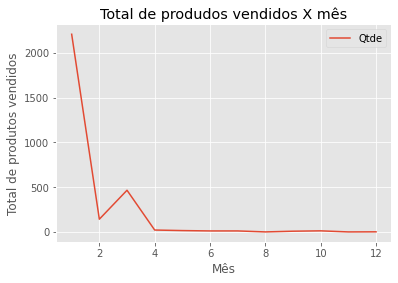

In [78]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de produdos vendidos X mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [79]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [81]:
# Selecionado apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [85]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

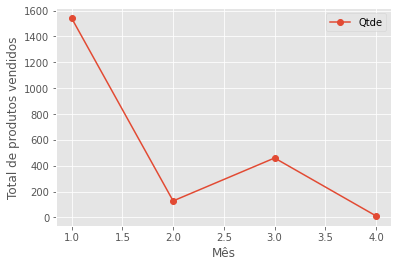

In [84]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

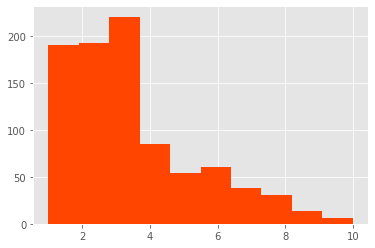

In [87]:
# Histograma
plt.hist(df["Qtde"], color="orangered");

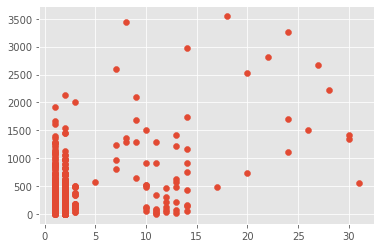

In [88]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

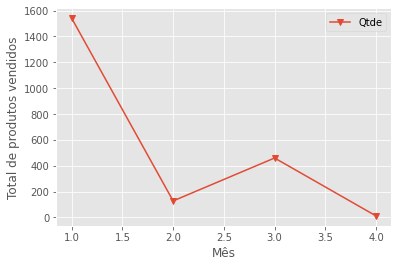

In [89]:
# Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")